## 데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv('data/auto.csv')
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


## Pairplot 그려보기

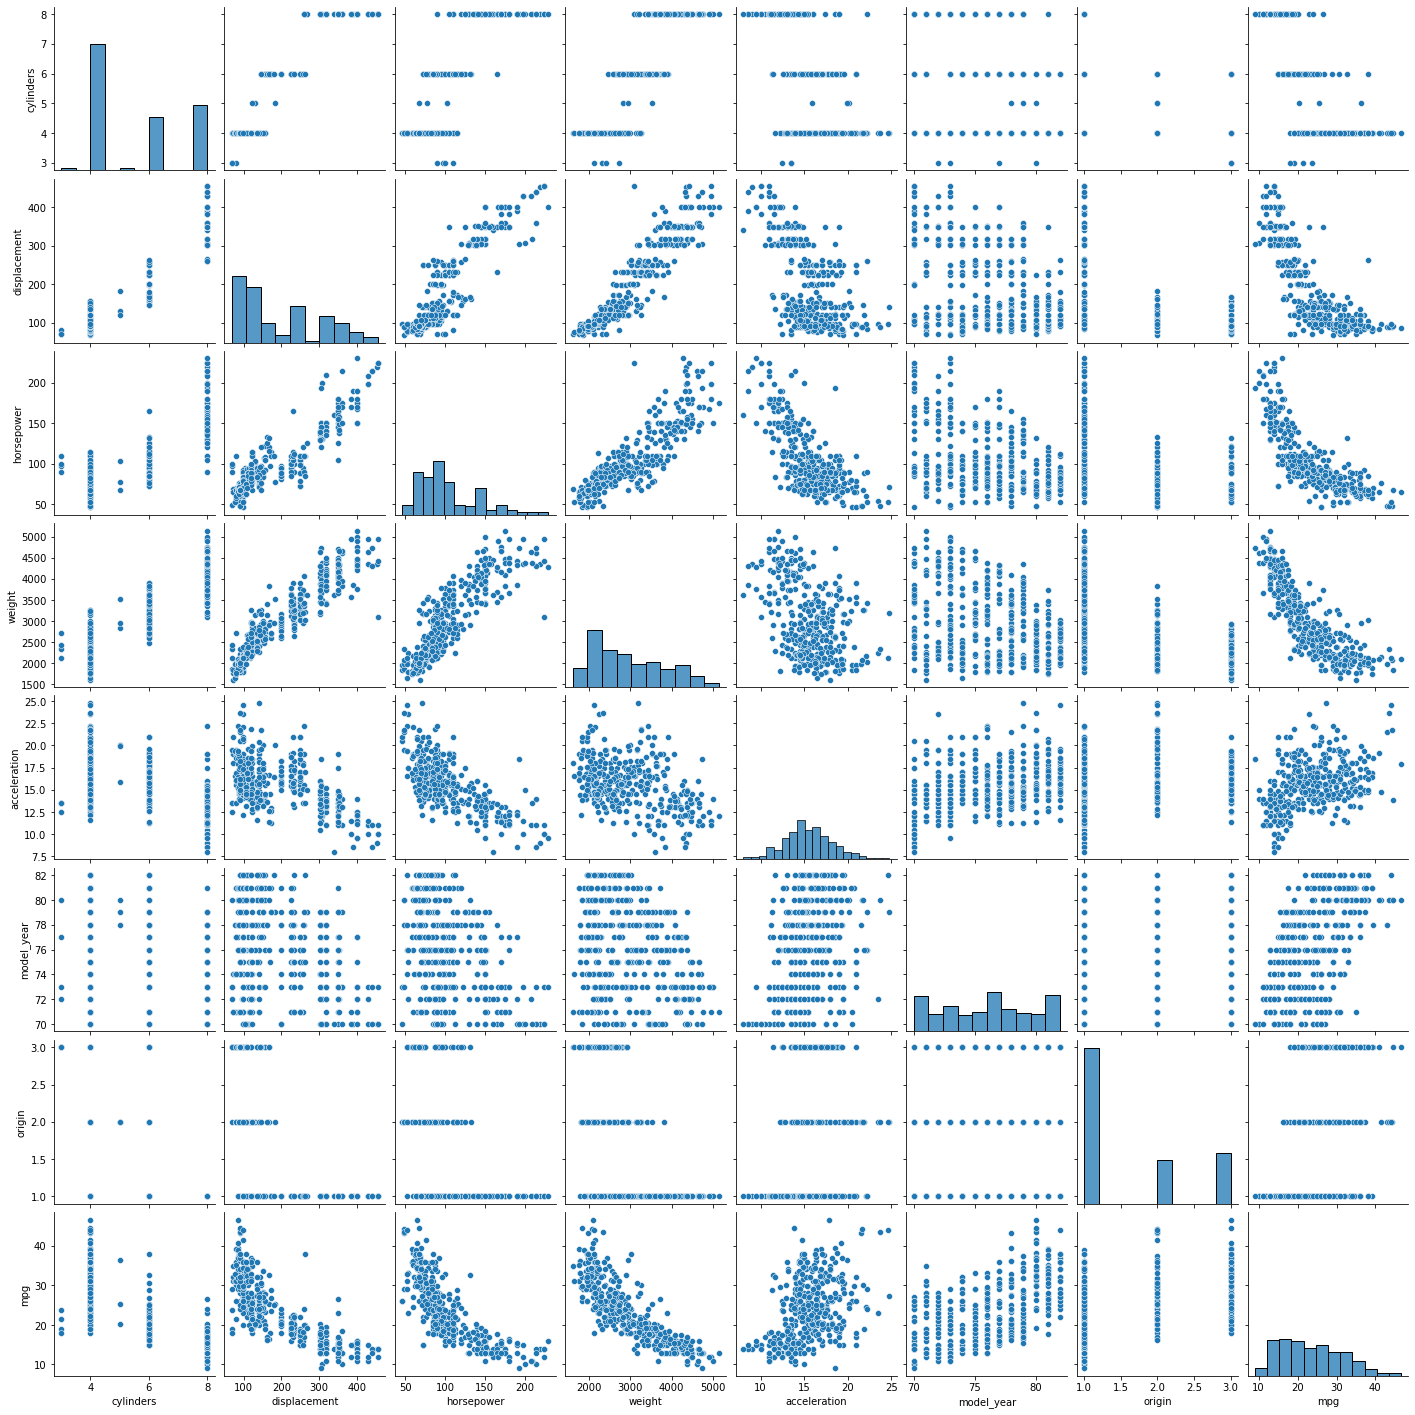

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모든 데이터 각각에 대하여 이차원 그래프 그리기
sns.pairplot(df)

## 누락치 등 전처리

In [3]:
df.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [4]:
# origin : 자동차 제조국가 1, 2, 3 (categorical variable)
df=pd.get_dummies(df,columns=['origin'])
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,18.0,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1,0,0


## X, y 나누기

In [5]:
y=df['mpg']

In [6]:
# mpg : miles per gallon (연비)
X=df.drop(columns=['mpg'])

## 회귀분석 모듈 불러오기

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

## 학습

In [8]:
reg.fit(X,y)

LinearRegression()

## 예측

In [9]:
y_pred = reg.predict(X)
y_pred[:5]

array([14.95325212, 14.04009845, 15.23055101, 14.99408418, 14.90194083])

## 학습된 계수 구하기

In [10]:
# 각 독립변수의 weight
reg.coef_

array([-0.48970942,  0.02397864, -0.01818346, -0.00671038,  0.07910304,
        0.77702694, -1.82774353,  0.80225883,  1.0254847 ])

In [11]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

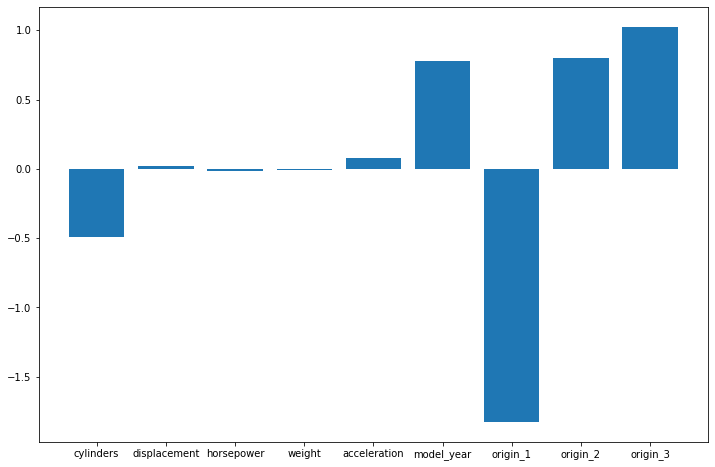

In [14]:
plt.figure(figsize=(12,8))
plt.bar(X.columns, reg.coef_)

# 아래 weight의 값을 비교할 수 없음
# 각 데이터의 단위가 다르기 때문 (스케일링 후 학습 필요)

## 데이터를 정규화하여 학습

In [15]:
X_std = (X-X.mean())/X.std()

In [16]:
X_std

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,0.773608,-0.457538,-0.501749
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,0.773608,-0.457538,-0.501749
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,0.773608,-0.457538,-0.501749
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,0.773608,-0.457538,-0.501749
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,0.773608,-0.457538,-0.501749
...,...,...,...,...,...,...,...,...,...
387,-0.862911,-0.519972,-0.479835,-0.220842,0.021267,1.634321,0.773608,-0.457538,-0.501749
388,-0.862911,-0.930889,-1.363154,-0.997859,3.283479,1.634321,-1.289347,2.180035,-0.501749
389,-0.862911,-0.567753,-0.531795,-0.803605,-1.428605,1.634321,0.773608,-0.457538,-0.501749
390,-0.862911,-0.711097,-0.661694,-0.415097,1.108671,1.634321,0.773608,-0.457538,-0.501749


In [17]:
reg.fit(X_std,y)

LinearRegression()

<BarContainer object of 9 artists>

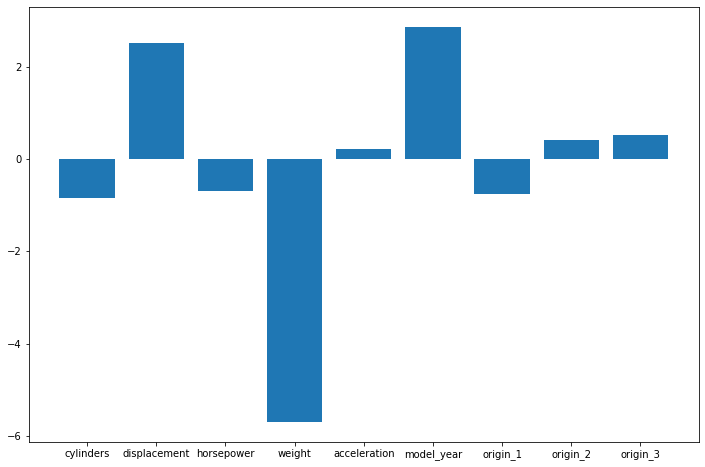

In [18]:
plt.figure(figsize=(12,8))
plt.bar(X_std.columns, reg.coef_)

### 해석 결과  
스케일링 전 중량(weight)의 계수가 가장 작았으나, 스케일링 후 연비(miles per gallon)에 가장 큰 영향을 주고 있음을 확인함  
중량이 클수록 연비는 줄어들고, model year가 클수록 (나중에 출시된 차량일수록) 기술이 진보하므로 연비가 증가함

## 예측값 vs 실제값

In [19]:
y_pred = reg.predict(X_std)

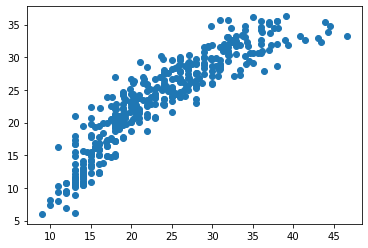

In [24]:
plt.scatter(y, y_pred)

## 비용계산
cost function은 경우에 따라 식이 바뀜  
오차의 크기를 효과적으로 나타낼 수 있는 수식으로 보정하여 사용함

In [25]:
import numpy as np
np.sqrt(np.sum((y-y_pred)**2))

64.71005855416105

In [26]:
np.sqrt(np.sum((y-y_pred)**2)/y.count())

3.2683515153304166